# ReCell Supervised Learning Project

## Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

## Importing the Necessary Libraries 

In [1]:
#Libraries that help read and manipulate data
import numpy as np
import pandas as pd

#Libraries that help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

#Libraries that help with model building 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the Dataset 

In [2]:
data=pd.read_csv('used_device.csv')

### Displaying the first few rows of the dataset 

In [3]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


### Checking the shape of the dataset 

In [4]:
data.shape

(3454, 15)

### Checking the different datatypes of the dataset 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* In this dataset, there are 4 categorical variables, and there are 11 numerical (9 that are float and 2 that are integer)

### Statistical Summary of the dataset 

In [6]:
data.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


* The average screen size is 13.71 inches, with a ram of 4.04 gb

### Checking for duplicate values 

In [7]:
data.duplicated().sum()

0

### Checking for missing values 

In [8]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

* There are 6 columns that are missing data, with the main camera column missing the most data and all them should be treated accordingly

In [9]:
#Creating a separate dataset so that the orginal remains unchanged
df=data.copy()

## Exploratory Data Analysis 

### Univariate Analysis

In [10]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  
        sharex=True,  
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    ) 
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    ) 
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature]) 
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  
        else:
            label = p.get_height()  

        x = p.get_x() + p.get_width() / 2 

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  

    plt.show()  

#### Numerical Variables 

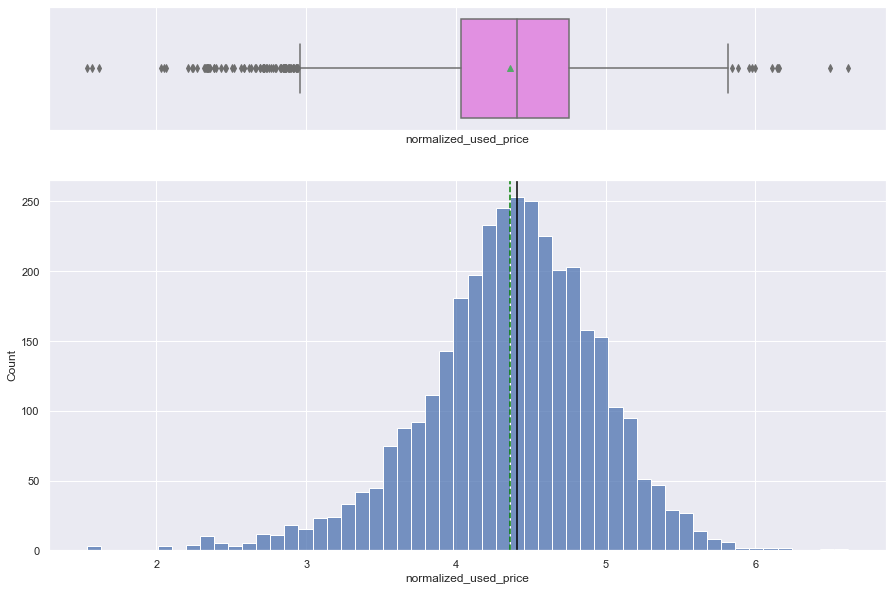

In [11]:
#Normalized Used Price 
histogram_boxplot(df,'normalized_used_price')

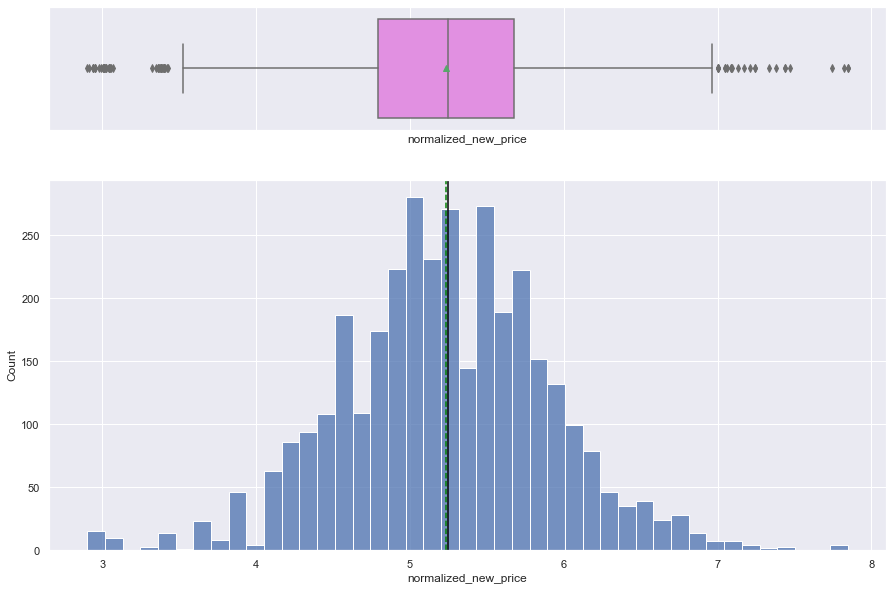

In [12]:
#Normalized New Price
histogram_boxplot(df,'normalized_new_price')

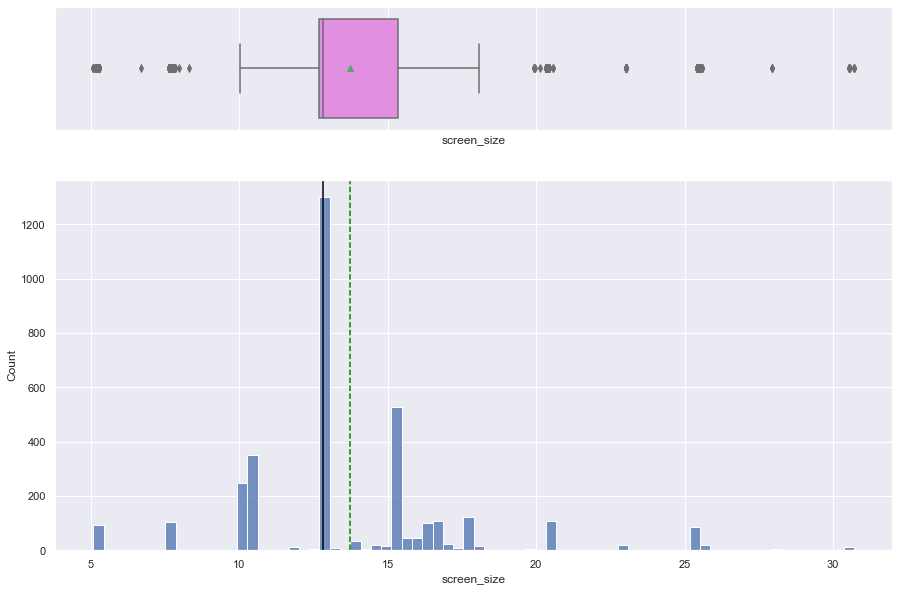

In [13]:
#Screen Size
histogram_boxplot(df,'screen_size')

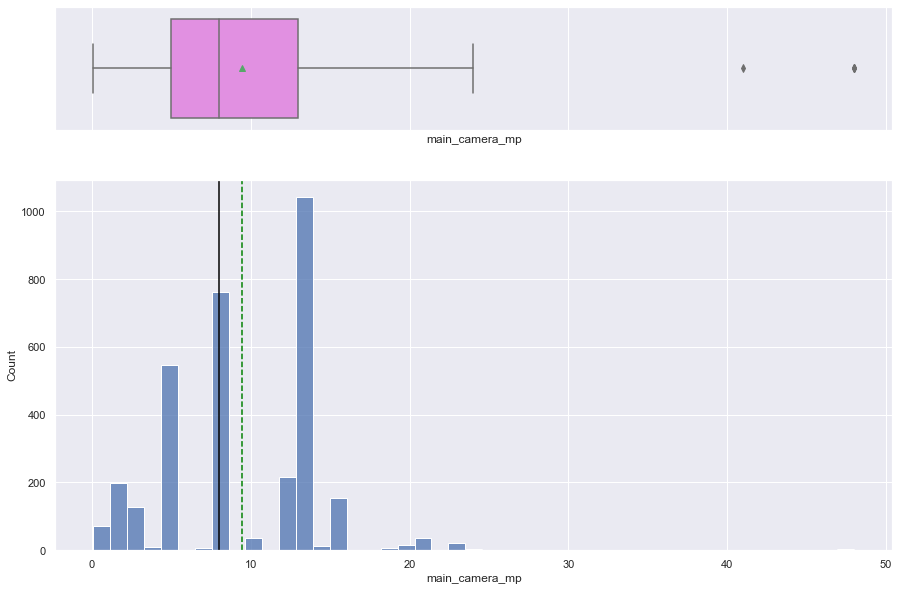

In [14]:
#main camera mp
histogram_boxplot(df,'main_camera_mp')

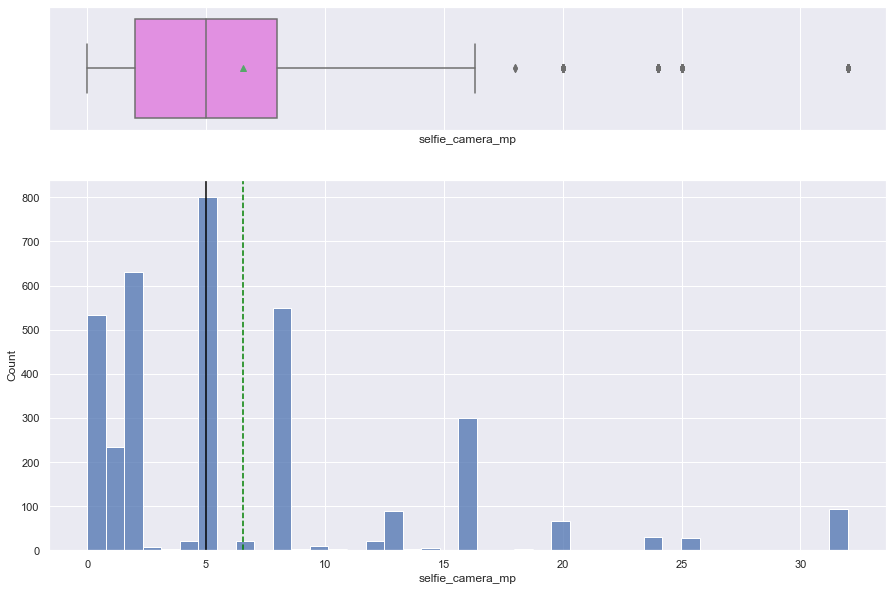

In [15]:
#Selfie Camera 
histogram_boxplot(df,'selfie_camera_mp')

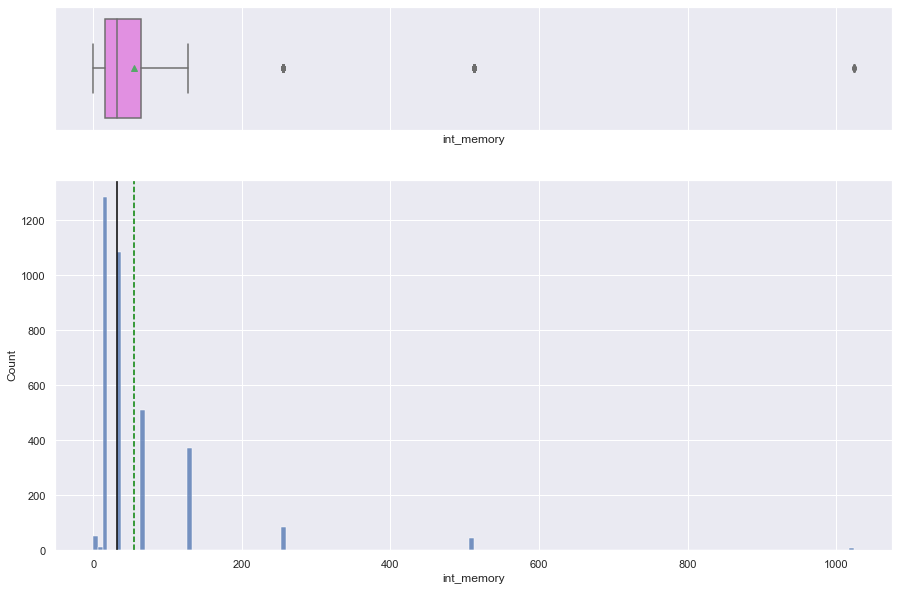

In [16]:
#Internal Memory
histogram_boxplot(df,'int_memory')

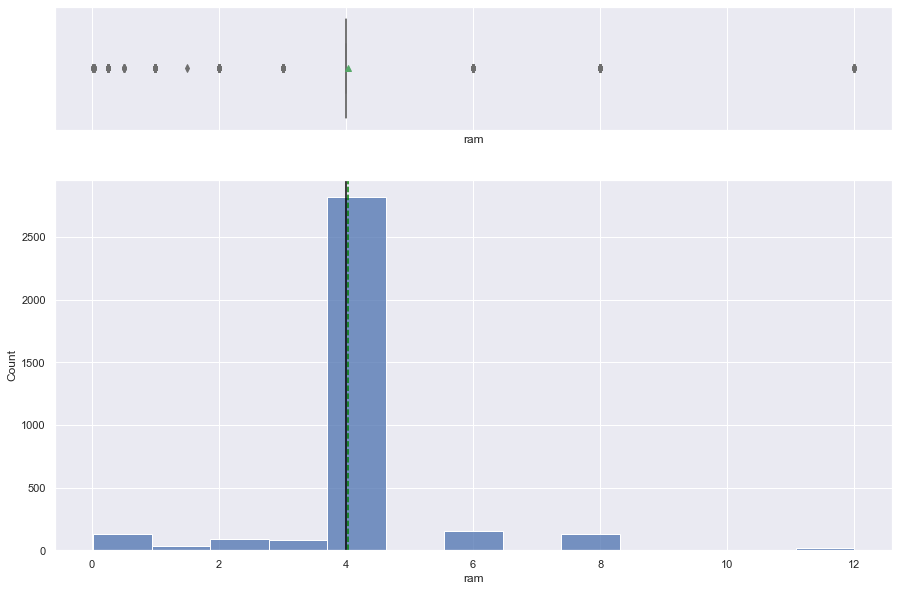

In [17]:
#Ram
histogram_boxplot(df,'ram')

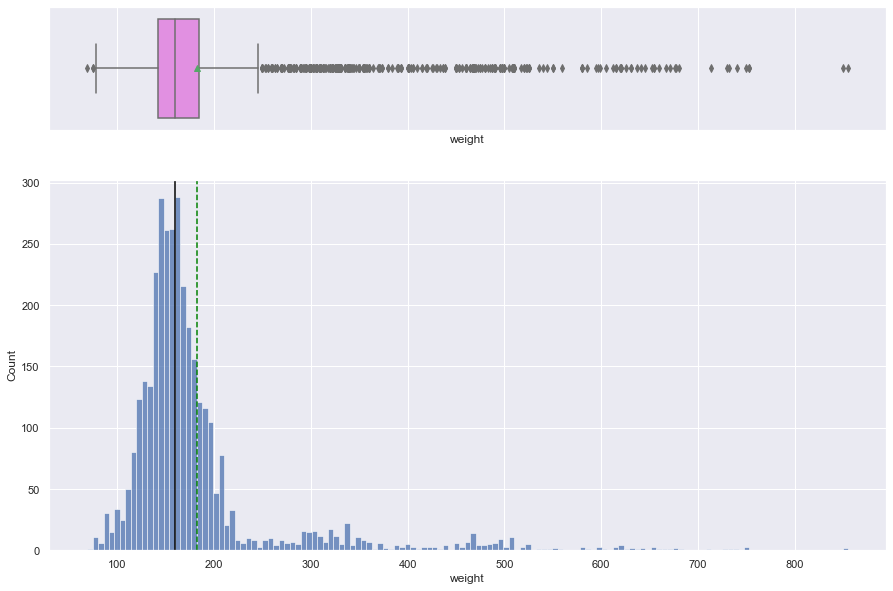

In [18]:
#Weight
histogram_boxplot(df,'weight')

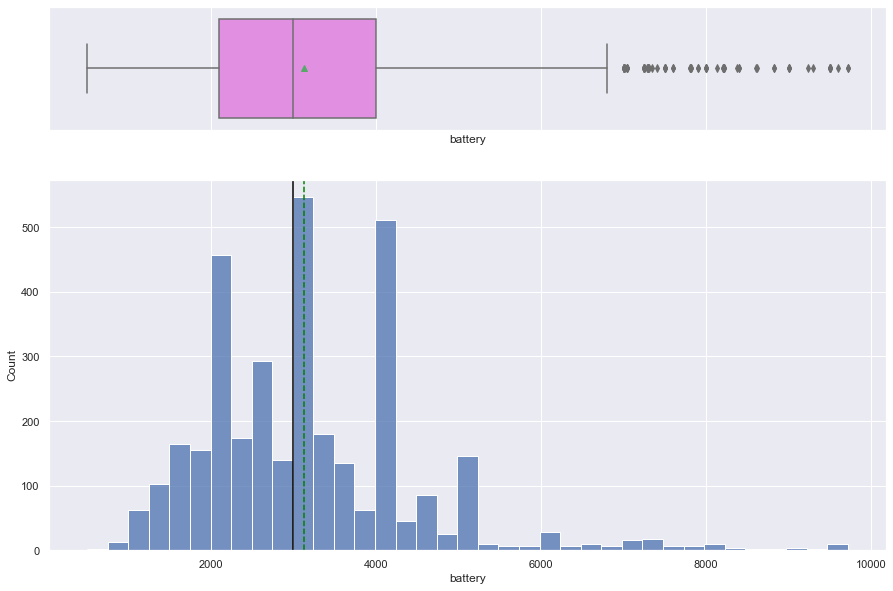

In [19]:
#Battery
histogram_boxplot(df,'battery')

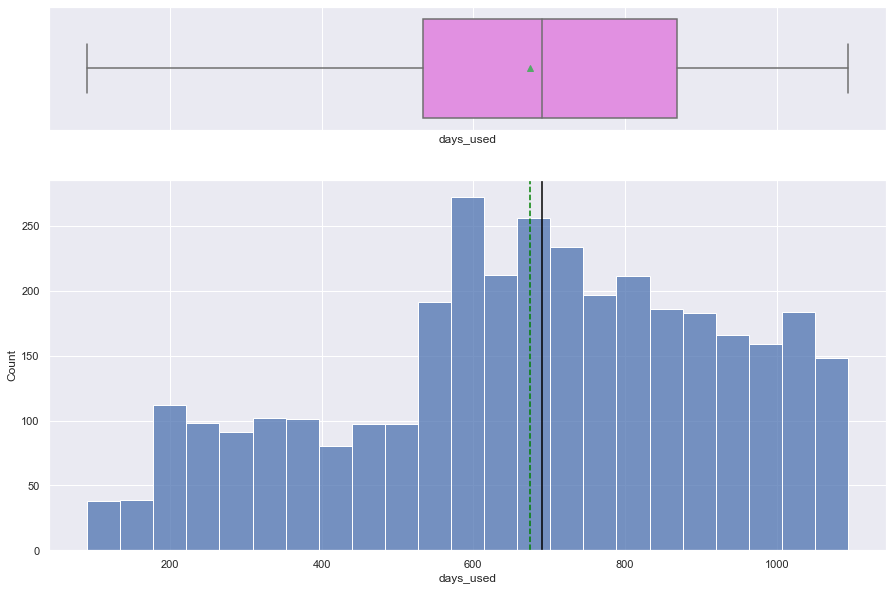

In [20]:
#Days Used
histogram_boxplot(df,'days_used')

#### Categorical Variables

NameError: name 'y' is not defined

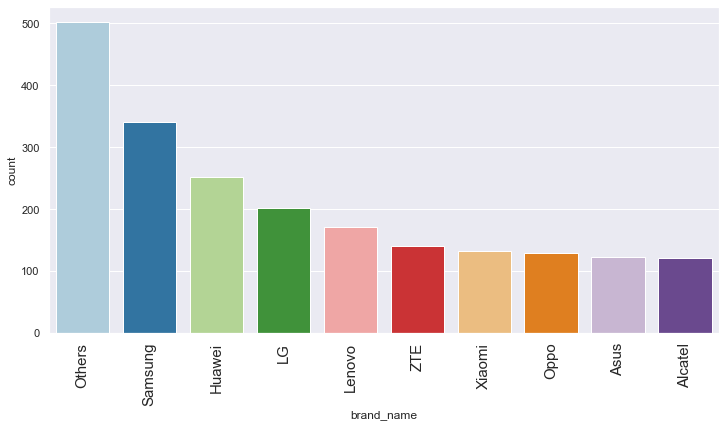

In [21]:
#Brand Name
labeled_barplot(df,'brand_name', perc=True, n=10)

NameError: name 'y' is not defined

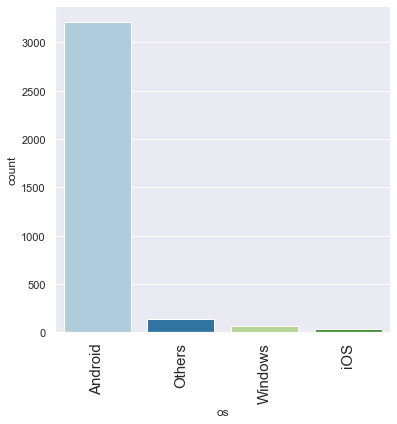

In [22]:
#OS
labeled_barplot(df,'os',perc=True)

NameError: name 'y' is not defined

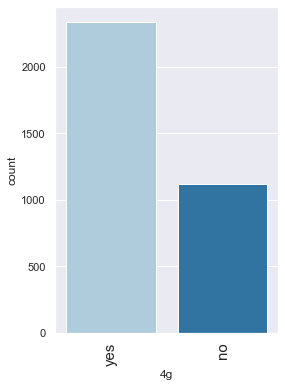

In [23]:
#4G
labeled_barplot(df,'4g',perc=True)

NameError: name 'y' is not defined

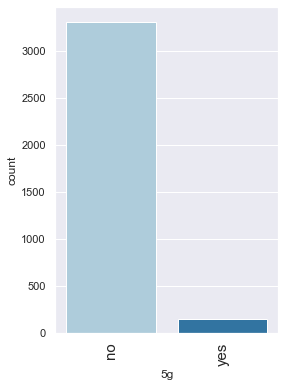

In [24]:
#5G
labeled_barplot(df,'5g',perc=True)

### Bivariate Analysis 

#### Correlation Check

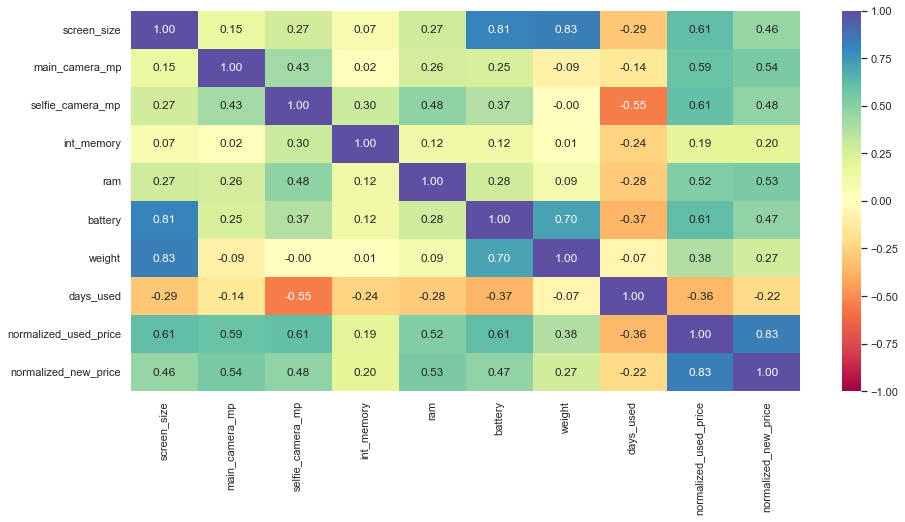

In [25]:
cols_list=df.select_dtypes(include=np.number).columns.tolist()
cols_list.remove('release_year')

plt.figure(figsize=(15,7))
sns.heatmap(df[cols_list].corr(),annot=True,cmap='Spectral', vmin=-1, vmax=1, fmt=".2f")
plt.show()

* We can see that the screen size has a high positive correlation with battery and weight

* Battery and weight have a high positive correlation, as well as used and new price

#### Ram per Brand Name

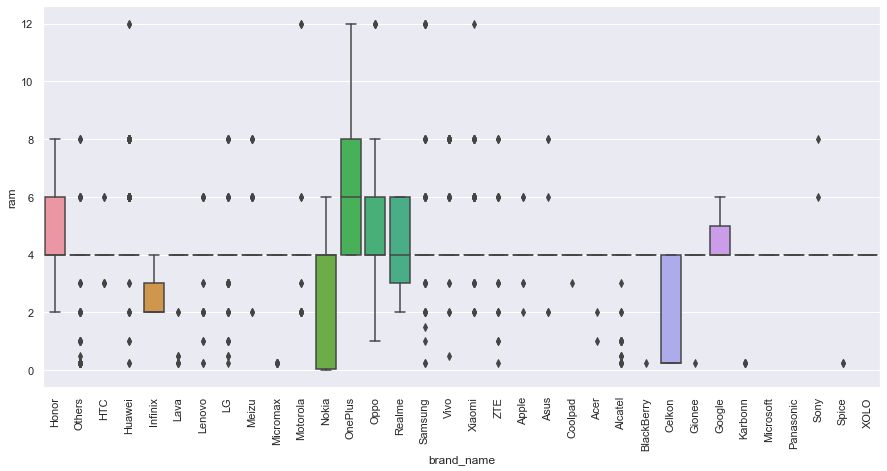

In [26]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='brand_name',y='ram')
plt.xticks(rotation=90)
plt.show()

* Outliers are varying based on the brand name. Some of the brands may have a high varition of RAM for their phones and some of them do not have that much variation

#### Looking at Phones with a Large Battery Size 

In [27]:
large_battery = df[df['battery']>4500]
large_battery.shape

(341, 15)

<Figure size 1080x504 with 0 Axes>

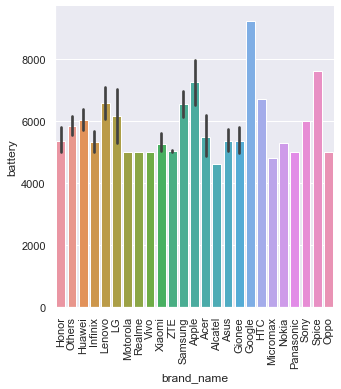

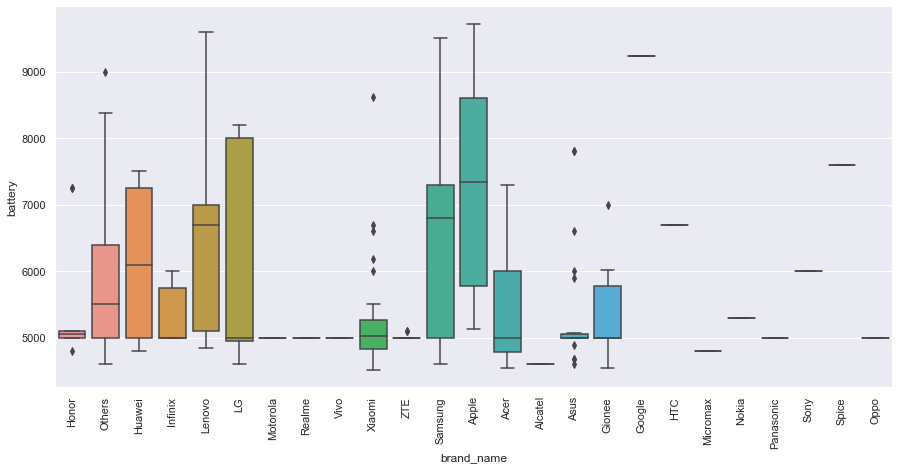

In [28]:
plt.figure(figsize=(15,7))
sns.catplot(data=large_battery,x='brand_name',y='battery',kind='bar')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15,7))
sns.boxplot(data=large_battery,x='brand_name',y='battery')
plt.xticks(rotation=90)
plt.show()

* We can see that large battery size varies based on brand name, but we would probably aim towards apple or google since these seem to have a relatively large battery size 

#### Checking which Phones have a Large Screen Size

In [29]:
large_screensize = df[df['screen_size']>6*2.54]
large_screensize.shape

(1099, 15)

<Figure size 1080x504 with 0 Axes>

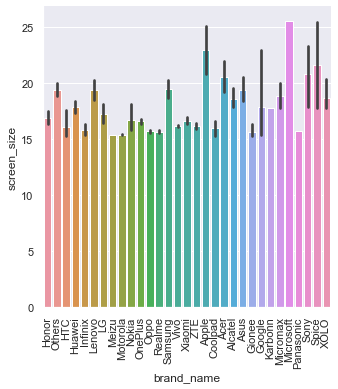

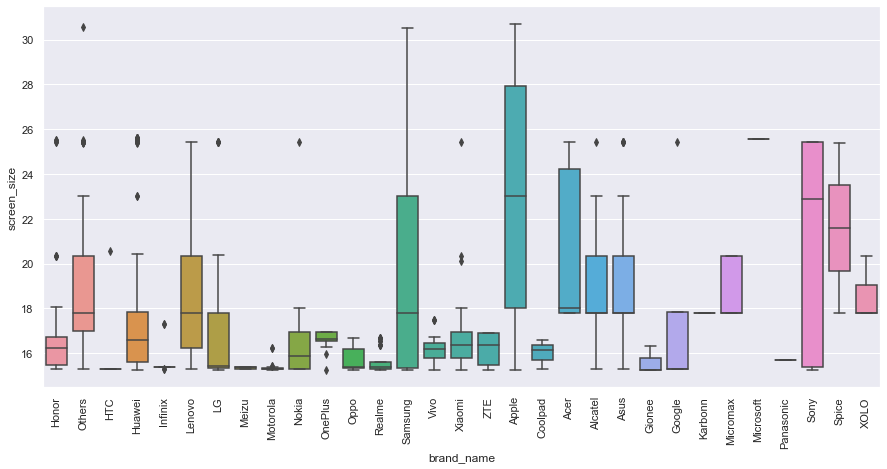

In [30]:
plt.figure(figsize=(15,7))
sns.catplot(data=large_screensize,x='brand_name',y='screen_size',kind='bar')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15,7))
sns.boxplot(data=large_screensize,x='brand_name',y='screen_size')
plt.xticks(rotation=90)
plt.show()

* Apple and Google both have the largest screen size with not that much variation in their screen size on different phones

#### Selfie Camera Largest

In [31]:
selfie_camera = df[df['selfie_camera_mp']>8]
selfie_camera.shape

(655, 15)

<Figure size 1080x504 with 0 Axes>

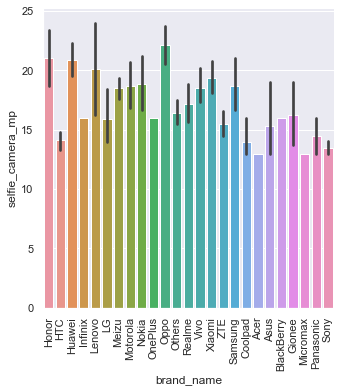

In [32]:
plt.figure(figsize=(15,7))
sns.catplot(data=selfie_camera,x='brand_name',y='selfie_camera_mp',kind='bar')
plt.xticks(rotation=90)
plt.show()

* Oppo seems to have the best selfie camera

#### Rear Cameras 

In [33]:
rear_camera = df[df['main_camera_mp']>16]
rear_camera.shape

(94, 15)

<Figure size 1080x504 with 0 Axes>

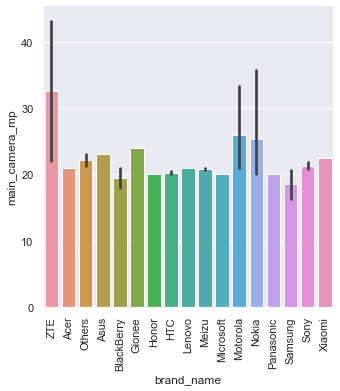

In [34]:
plt.figure(figsize=(15,7))
sns.catplot(data=rear_camera,x='brand_name',y='main_camera_mp',kind='bar')
plt.xticks(rotation=90)
plt.show()

* We see that the ZLE phone has the best main camera 

#### Used Phone Prices Time Variation

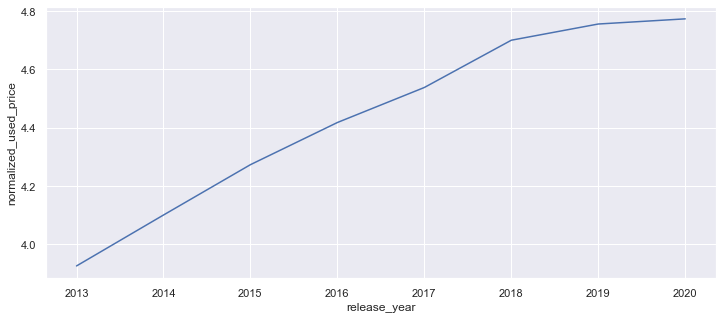

In [35]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df,x='release_year',y='normalized_used_price',ci=None)
plt.show()

* Used phones have uptrended in the past 8 years

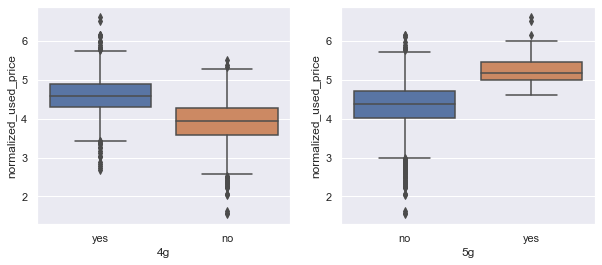

In [36]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

## Data Preprocessing 

### Missing Value Imputation 

In [37]:
#Creating a copy of the data
df1=df.copy()

In [38]:
#Finding how many missing values the dataset has
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [39]:
cols_impute = ["main_camera_mp","selfie_camera_mp","int_memory","ram","battery","weight",]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name','release_year'])[col].transform("median"))

df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

#### Imputing the Values Based on Brand Name 

In [40]:
cols_impute = ["main_camera_mp","selfie_camera_mp","battery","weight",]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name'])[col].transform("median"))
    
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

#### Imputing the Last Values Based on Main Camera 

In [41]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

## Feature Engineering 

In [42]:
df1['years_since_release']=2021-df['release_year']
df1.drop('release_year',axis=1,inplace=True)
df1['years_since_release'].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

## Outlier Detection 

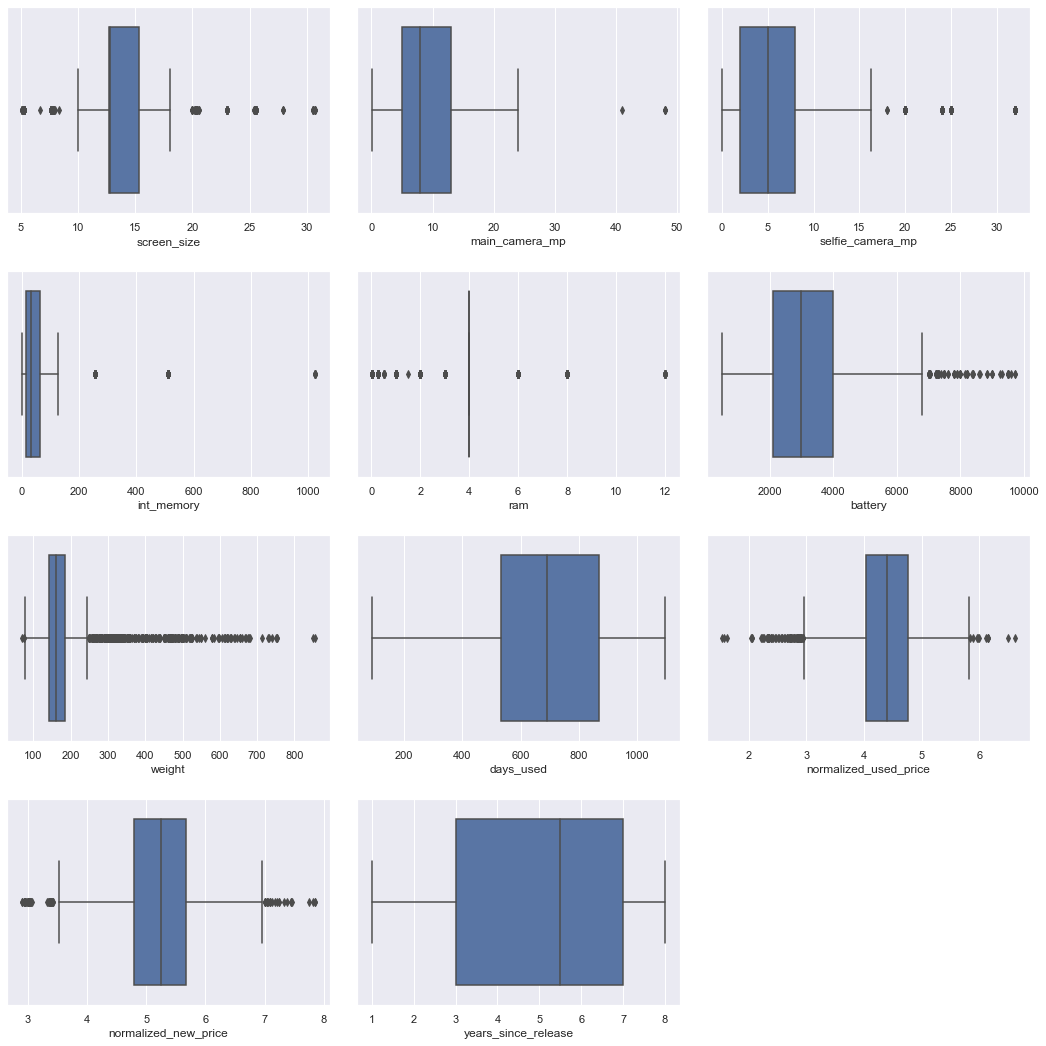

In [45]:
num_cols=df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15,15))

for i, variable in enumerate(num_cols):
    plt.subplot(4,3, i+1)
    sns.boxplot(data=df1,x=variable)
    plt.tight_layout(pad=2)

plt.show()

## Data Preparation for Modeling 

In [46]:
#Defining the independent and dependent variables
x=df1.drop('normalized_used_price',axis=1)
y=df1['normalized_used_price']
print(x.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [47]:
#Adding a constant to the variables
x=sm.add_constant(x)

In [48]:
#Create dummy variables
x=pd.get_dummies(x,columns=x.select_dtypes(include=['object','category']).columns.tolist(),drop_first=True)
x.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [49]:
#Splitting the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
print(x_train.head())
print(y_train.head())

      const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
3026    1.0        10.29             8.0               0.3        16.0  4.0   
1525    1.0        15.34            13.0               5.0        32.0  4.0   
1128    1.0        12.70            13.0               5.0        32.0  4.0   
3003    1.0        12.83             8.0               5.0        16.0  4.0   
2907    1.0        12.88            13.0              16.0        16.0  4.0   

      battery  weight  days_used  normalized_new_price  ...  brand_name_Spice  \
3026   1800.0   120.0        819              4.796204  ...                 0   
1525   4050.0   225.0        585              5.434595  ...                 0   
1128   2550.0   162.0        727              5.137914  ...                 0   
3003   3200.0   126.0        800              5.189228  ...                 0   
2907   2900.0   160.0        560              5.016220  ...                 0   

      brand_name_Vivo  brand_name_XOLO

## Model Building - Linear Regression

### Model Performance Check 

In [51]:
#Computing the Adjusted R-Squared function
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictions.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

#Computing the MAPE function
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

#Function to compute different metrics to check performance of a regression
def model_performance_regression(model, predictors, target):
    #Predict using independent variables
    pred = model.predict(predictors)
    
    r2 = r2_score(target, pred)
    adjr2 = adj_r2_score(predictors, target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mape_score(target, pred)
    
     # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [53]:
#Checking training model performance
olsmodel1_train_perf=model_performance_regression(olsmodel1,x_train,y_train)
olsmodel1_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


* The MAPE for the training set indicates that the predicted values are about 4.33% away from the actual values
* Approximately 84% of the data represented in the model accounts for the variation in the variables

In [54]:
#Checking the testing model performance
olsmodel_test_perf=model_performance_regression(olsmodel1,x_test,y_test)
olsmodel_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


* The r-squared and the adjusted r-squared for both the training model and testing model are very close to eachother, as well as all of the other metrics in the training model

## Linear Regression Assumptions 


### 1) Multicollinearity 

In [58]:
#Let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(predictors):
    vif=pd.DataFrame()
    vif['Feature']=predictors.columns
    
    vif['VIF']=[variance_inflation_factor(predictors.values,i) for i in range (len(predictors.columns))]
    
    return vif

In [59]:
checking_vif(x_train)

,Feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


#### Removing Multicollinearity 

In [68]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []
    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]
        
        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))
# creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [69]:
col_list = ['screen_size','weight'] ## Complete the code to specify the columns with high VIF

res = treating_multicollinearity(x_train, y_train, col_list) ## Complete the code to check the effect on model performance after dropping specified columns from train data
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838381,0.234703
1,weight,0.838071,0.234928


In [70]:
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,Feature,VIF
0,const,202.673906
1,main_camera_mp,2.281835
2,selfie_camera_mp,2.809009
3,int_memory,1.362043
4,ram,2.282350
5,battery,3.842989
6,weight,2.993855
7,days_used,2.648929
8,normalized_new_price,3.077650
9,years_since_release,4.730315


In [73]:
olsmodel2=sm.OLS(y_train,x_train2).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Fri, 02 Dec 2022   Prob (F-statistic):               0.00
Time:                           18:14:01   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Removing High P-Values 

In [74]:
# initial list of columns
predictors = x_train2.copy()  ## Complete the code to check for p-values on the right dataset
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [75]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [76]:
olsmod3 = sm.OLS(y_train, x_train3).fit()
print(olsmod3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Fri, 02 Dec 2022   Prob (F-statistic):               0.00
Time:                           18:20:09   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [77]:
#Checking the performance of the training data
ols3_train_perf=model_performance_regression(olsmod3,x_train3,y_train)
ols3_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [80]:
#Checking the performance of the testing data
ols3_test_perf=model_performance_regression(olsmod3,x_test3,y_test)
ols3_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


### 2) Testing for Linearity of Variables

In [84]:
#Make the dataframe first 
df1_pred = pd.DataFrame()

df1_pred['Actual']=y_train
df1_pred['Fitted']=olsmod3.fittedvalues
df1_pred['Residuals']=olsmod3.resid

df1_pred.head()

,Actual,Fitted,Residuals
3026,4.087488,3.867319,0.220169
1525,4.448399,4.602001,-0.153602
1128,4.315353,4.286957,0.028395
3003,4.282068,4.195169,0.086899
2907,4.456438,4.490563,-0.034125


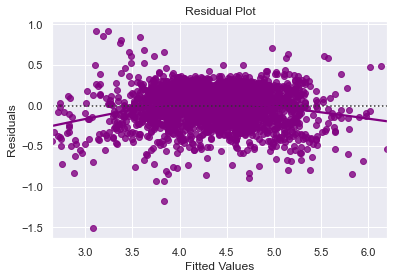

In [86]:
#Create a residual plot
sns.residplot(data=df1_pred,x='Fitted',y='Residuals',color='purple',lowess=True)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

* Since the residual plot shows no existing linear pattern among the residuals, it is safe to say that it is nonlinear, making this assumption satisfied

### 3) Normality of Residuals 

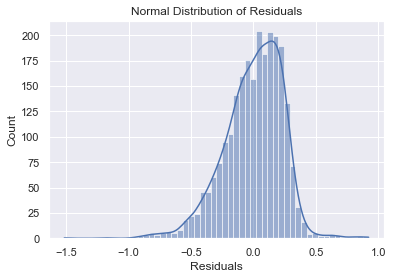

In [87]:
#Look at the distribution of residuals
sns.histplot(data=df1_pred,x='Residuals',kde=True)
plt.title('Normal Distribution of Residuals')
plt.show()

* Looks like it the residuals are skewed a little to the left, but lets look at other tests to make sure

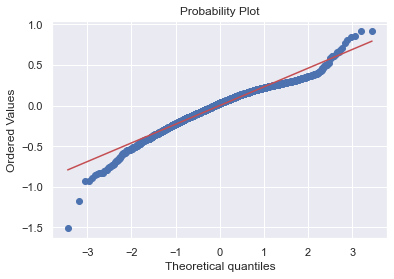

In [88]:
#Looking at its Q-Q plot
import pylab
import scipy.stats as stats
stats.probplot(df1_pred['Residuals'],dist='norm',plot=pylab)
plt.show()

* It does not seem that the qq plot is normal as the residuals do not form even close to a straight line, let;s conduct a shapiro test to see what the p-value is 

In [91]:
T_stat,p_value = stats.shapiro(df1_pred['Residuals'])
print('P-value:',p_value)

P-value: 6.995328206686811e-23


* Although the normal distribution and qq plot showed that the residuals visually do not seem normal, the shapiro test also says that the residuals are not normal, but we can assume that they are close to being normal based on the visual representations of it

### 4) Homoskedasticity 

In [94]:
#Conducting the test for homoskedasticity
import statsmodels.stats.api as sms 
from statsmodels.compat import lzip 
name = ['F statistic','p-value']
test=sms.het_goldfeldquandt(df1_pred['Residuals'],x_train3)
lzip(name,test)

[('F statistic', 1.0087504199106763), ('p-value', 0.4401970650667071)]

* Since the p-value is greater than 0.05, we fail to reject the null hypothesis, making this homoskedatic and satisfying this assumption

## Final Model Summary 

In [95]:
olsFinal=sm.OLS(y_train,x_train3).fit()
print(olsFinal.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Fri, 02 Dec 2022   Prob (F-statistic):               0.00
Time:                           19:26:13   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [96]:
#Checking model performance on training set
olsFinal_Train_Perf = model_performance_regression(olsFinal,x_train3,y_train)
olsFinal_Train_Perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [97]:
#Checking the model performance on testing set
olsFinal_Test_Perf = model_performance_regression(olsFinal,x_test3,y_test)
olsFinal_Test_Perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


## Actionable Insights and Recommendations 
* Focus on phones that have both 5g and 4g, in which since they are both preferenced by consumers
* Android OS is the most popular operating systems on phones that do not vertically integrate their own such as apple. This is why Samsung is the most popular phone.
* The used prices are increasing drastically and there are factors that affect its value such as brand name and weight. If you get a phone that has a higher weight, it also may have a bigger screen size. Aim for the higher weight phones, since they will increase the used price of the phone